In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Dataset dan Dataload

In [5]:
# # 2. Dataset dan Dataloader
# class TimeSeriesDataset(Dataset):
#     def __init__(self, data, seq_length):
#         self.data = data
#         self.seq_length = seq_length

#     def __len__(self):
#         return len(self.data) - self.seq_length

#     def __getitem__(self, idx):
#         x = self.data[idx:idx + self.seq_length]
#         y = self.data[idx + self.seq_length]
#         return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [29]:
# Memuat dataset
# Contoh dataset time series
# Jika dataset Anda memiliki kolom tanggal, pastikan untuk mem-parse tanggalnya terlebih dahulu
# dan mengonversinya ke format string seperti berikut:
import pandas as pd

# Membaca dataset
data = pd.read_csv('data/data/daily_min_temp.csv')

# Memastikan kolom 'Date' diubah ke tipe datetime
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])  # Jangan ubah ke string

# Mengatur kolom 'Date' sebagai indeks
data.set_index('Date', inplace=True)

# Menampilkan data resample per minggu menggunakan mean
weekly_data = data.resample('W').mean()

# Menampilkan 5 data pertama
print(weekly_data.head())


                 Temp
Date                 
1981-01-04  18.000000
1981-01-11  17.542857
1981-01-18  20.371429
1981-01-25  15.771429
1981-02-01  16.657143


In [33]:
weekly_data

,Temp
Date,
1981-01-04,18.000000
1981-01-11,17.542857
1981-01-18,20.371429
1981-01-25,15.771429
1981-02-01,16.657143
...,...
1990-12-09,17.600000
1990-12-16,12.428571
1990-12-23,14.485714


<Axes: xlabel='Date'>

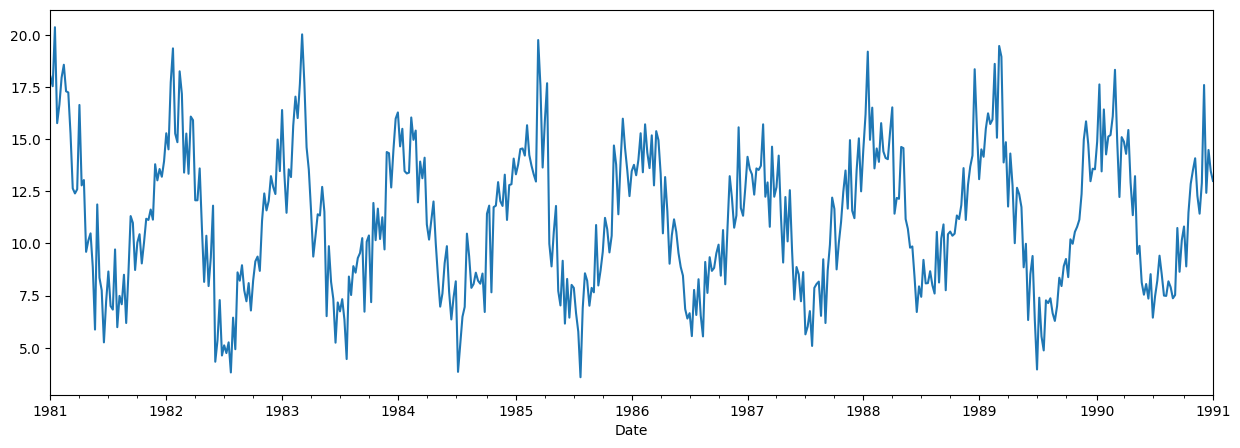

In [32]:
weekly_data.Temp.plot(figsize=(15, 5))

# Dataset Splitting

In [38]:
train_data, test_data = train_test_split(weekly_data, test_size=0.2, shuffle=False)
train_data.shape, test_data.shape

((418, 1), (105, 1))

In [50]:
# Hyperparameters
seq_length = 6  # Panjang sequence untuk input
batch_size = 16

# Membuat dataset dan dataloader
train_dataset = TimeSeriesDataset(train_data, seq_length)
test_dataset = TimeSeriesDataset(test_data, seq_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Bingung cara melihat ouputnya

In [54]:
# 3. Arsitektur dan Config
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, hidden = self.rnn(x, hidden)
        x = self.fc(x)
        return x

# Hyperparameters untuk model
input_size = train_dataset.n_feature,  # Karena data time series hanya memiliki satu fitur
hidden_size = 64
num_layers = 2
output_size = 1

# Inisialisasi model, loss function, dan optimizer
model = RNNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

AttributeError: 'TimeSeriesDataset' object has no attribute 'n_feature'